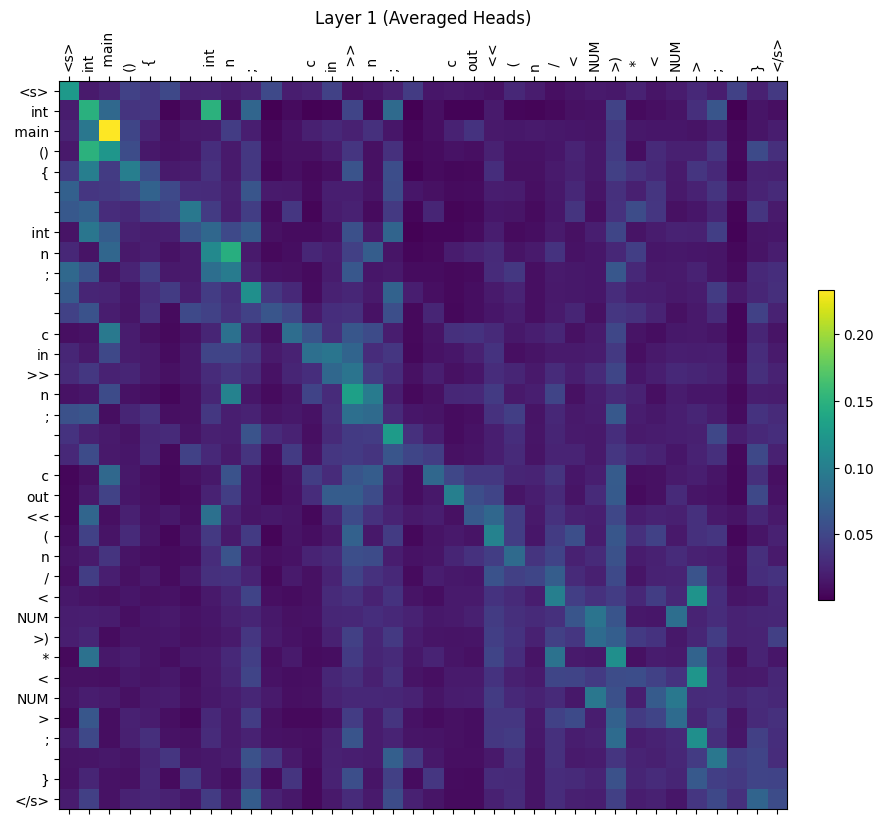

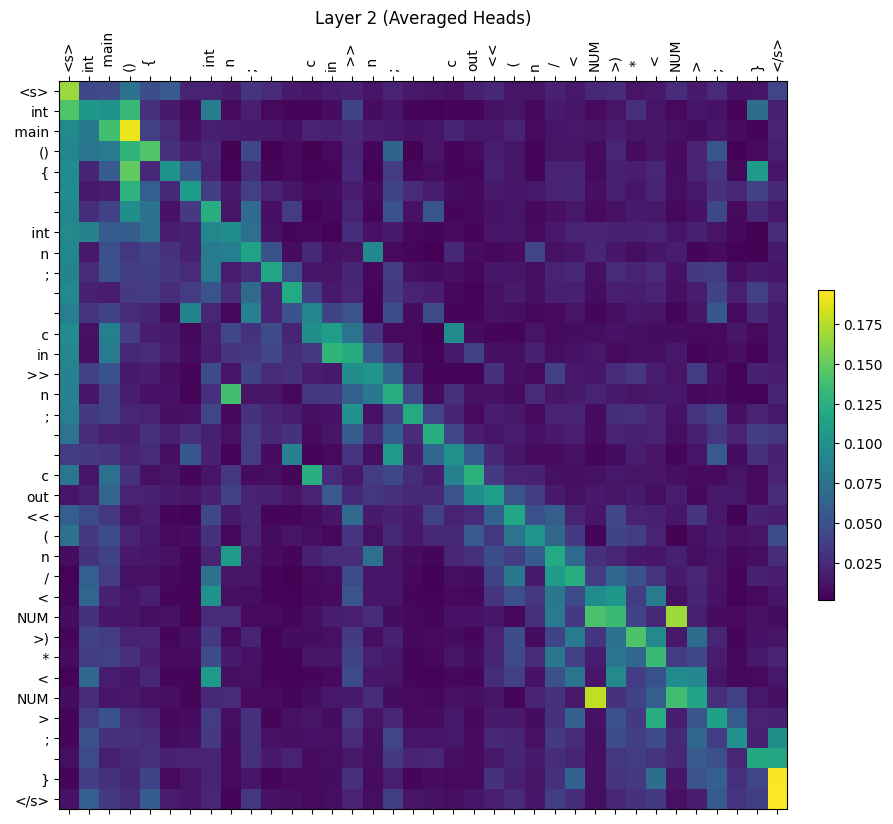

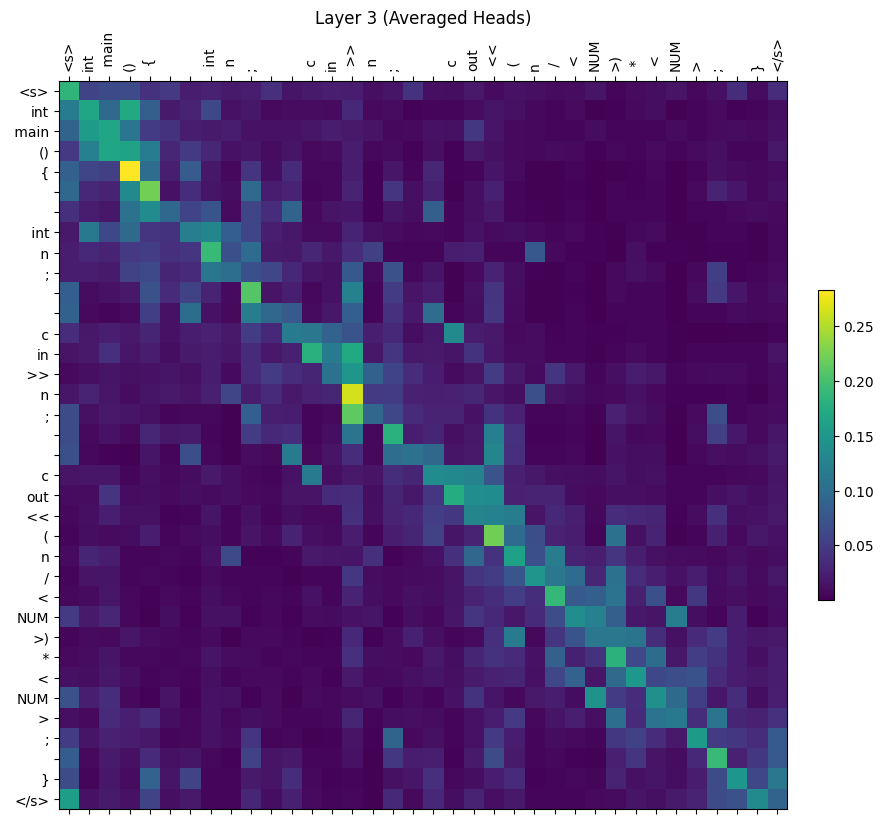

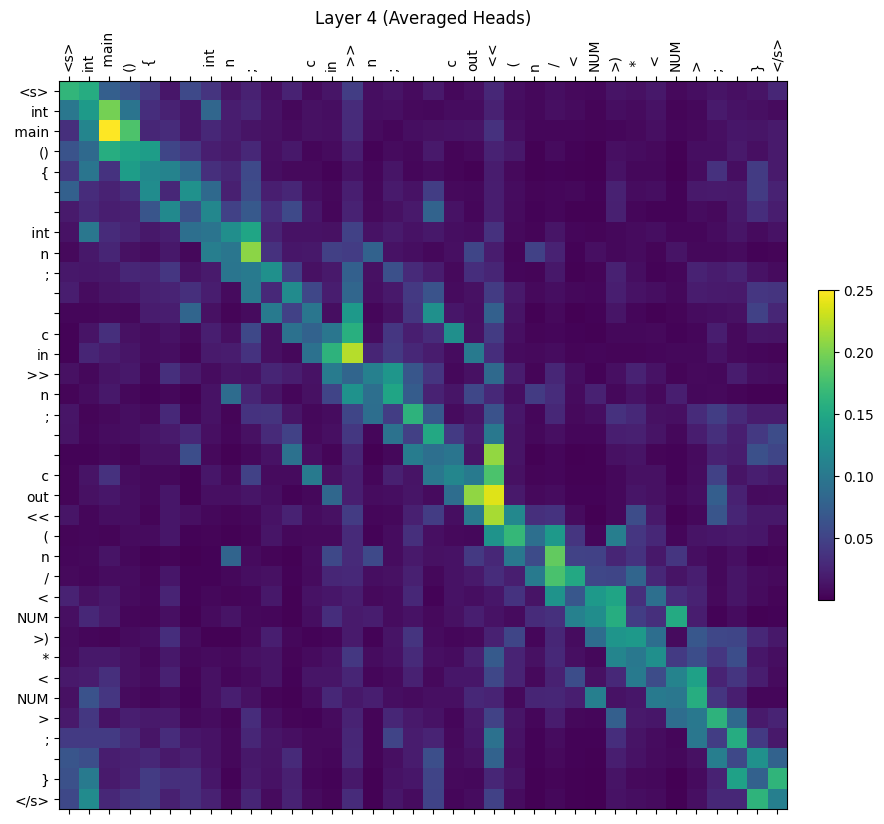

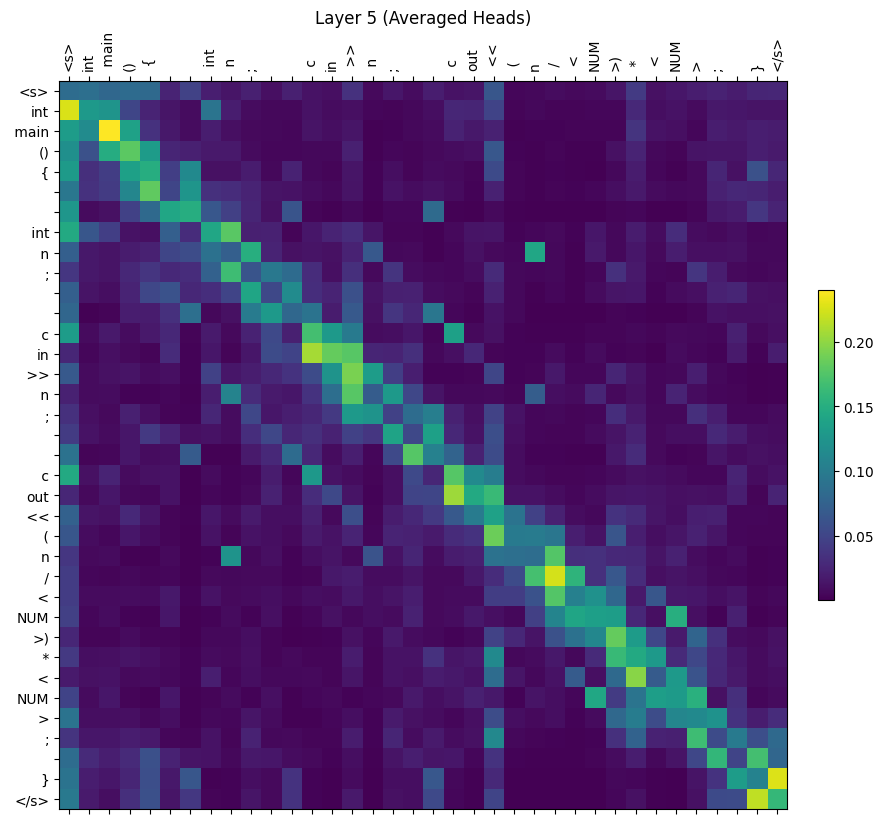

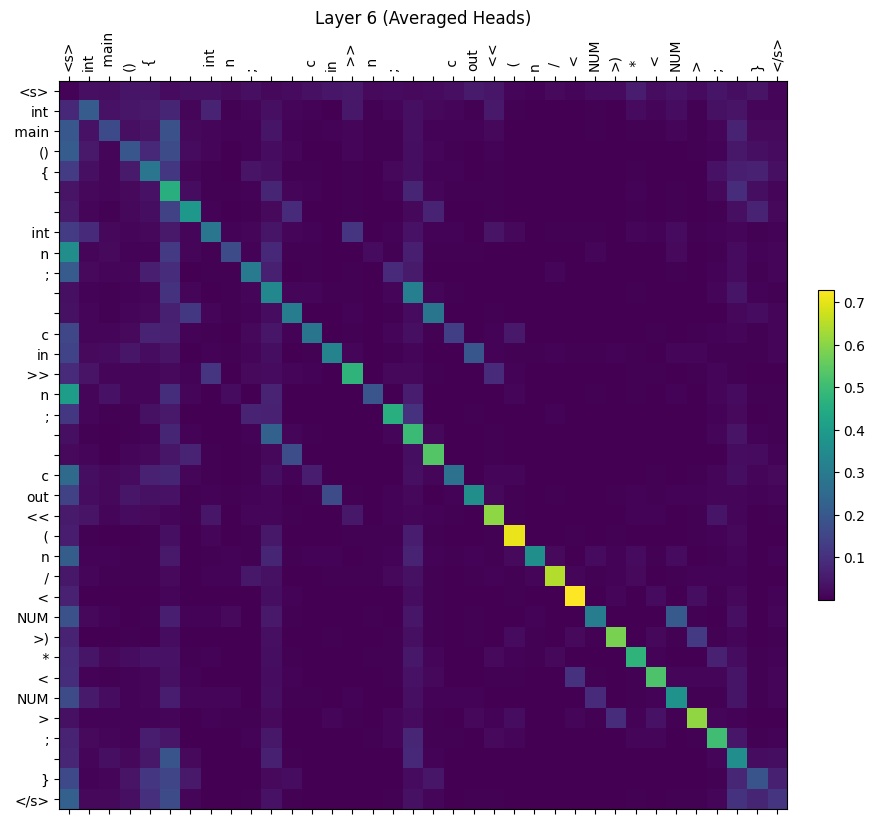

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import RobertaModel, RobertaTokenizer
import torch

tokenizer = RobertaTokenizer.from_pretrained('huggingface/CodeBERTa-small-v1')
model = RobertaModel.from_pretrained('huggingface/CodeBERTa-small-v1', output_attentions=True)
inputs = tokenizer("int main() {\n    int n;\n    cin >> n;\n    cout << (n / <NUM>) * <NUM>;\n}", return_tensors='pt')


outputs = model(**inputs)

attentions = outputs.attentions

input_ids = inputs['input_ids'][0].tolist()
def plot_attention(attention, title, input_ids):
    token_ids = input_ids
    attention_matrix = attention

    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(attention_matrix, cmap='viridis')
    ax.set_xticks(np.arange(len(token_ids)))
    ax.set_yticks(np.arange(len(token_ids)))

    ax.set_xticklabels([tokenizer.decode([id_]) for id_ in token_ids], rotation=90)
    ax.set_yticklabels([tokenizer.decode([id_]) for id_ in token_ids])

    ax.set_title(title)
    
    fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()

num_layers = len(attentions)
num_heads = attentions[0].size(1)

for layer in range(num_layers):
    avg_attention = torch.mean(attentions[layer][0], dim=0).detach().numpy()
    plot_attention(avg_attention, f'Layer {layer + 1} (Averaged Heads)', input_ids)


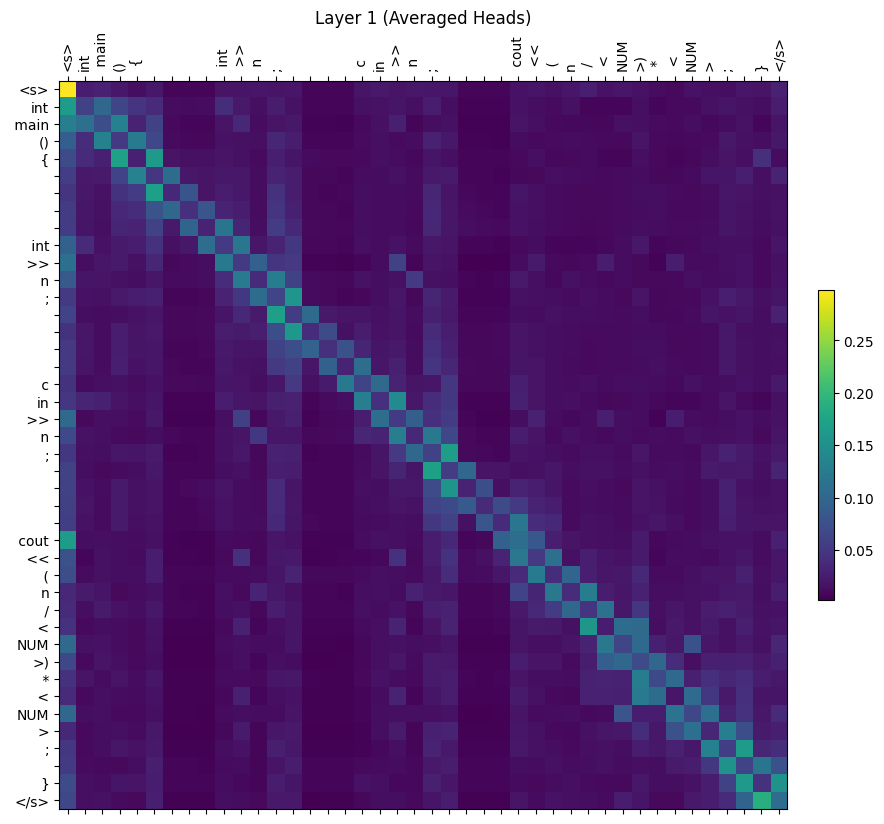

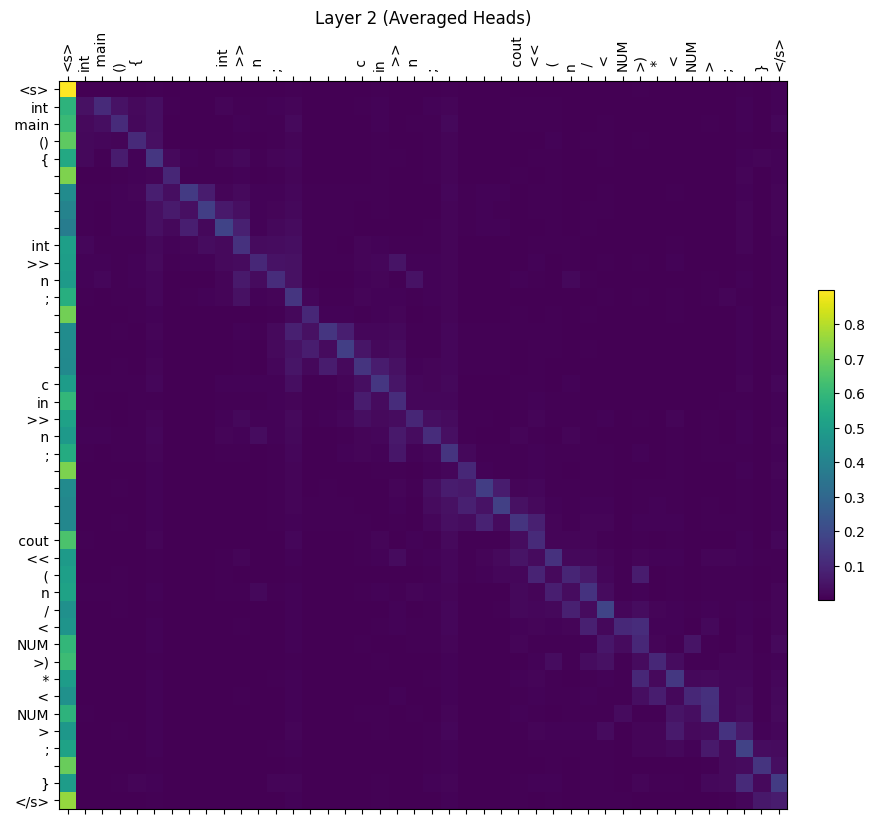

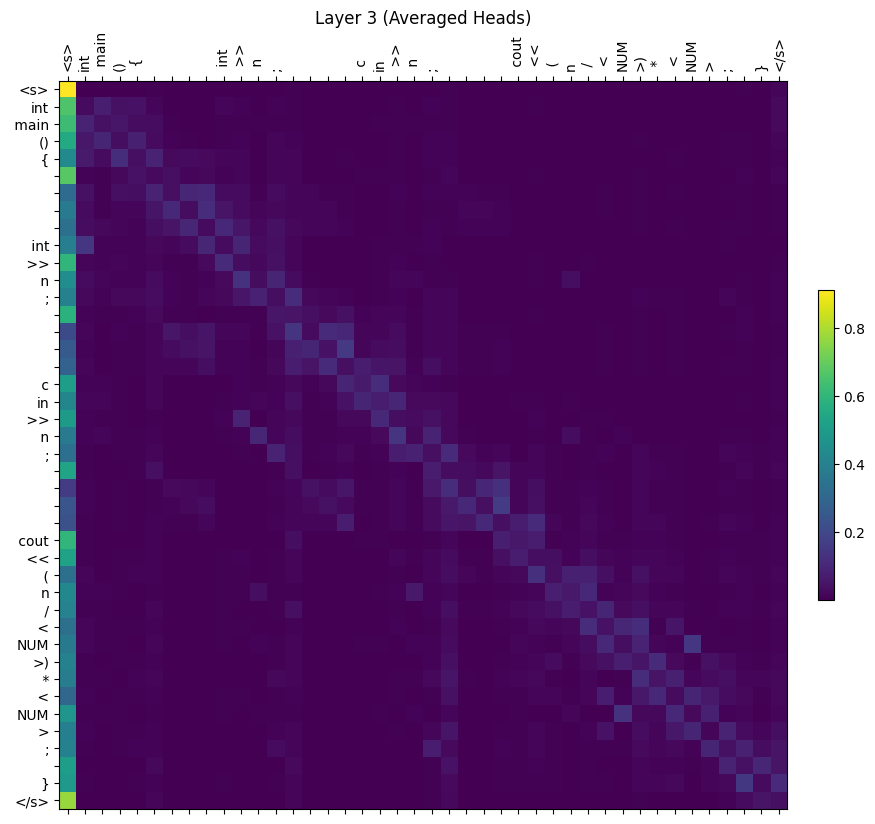

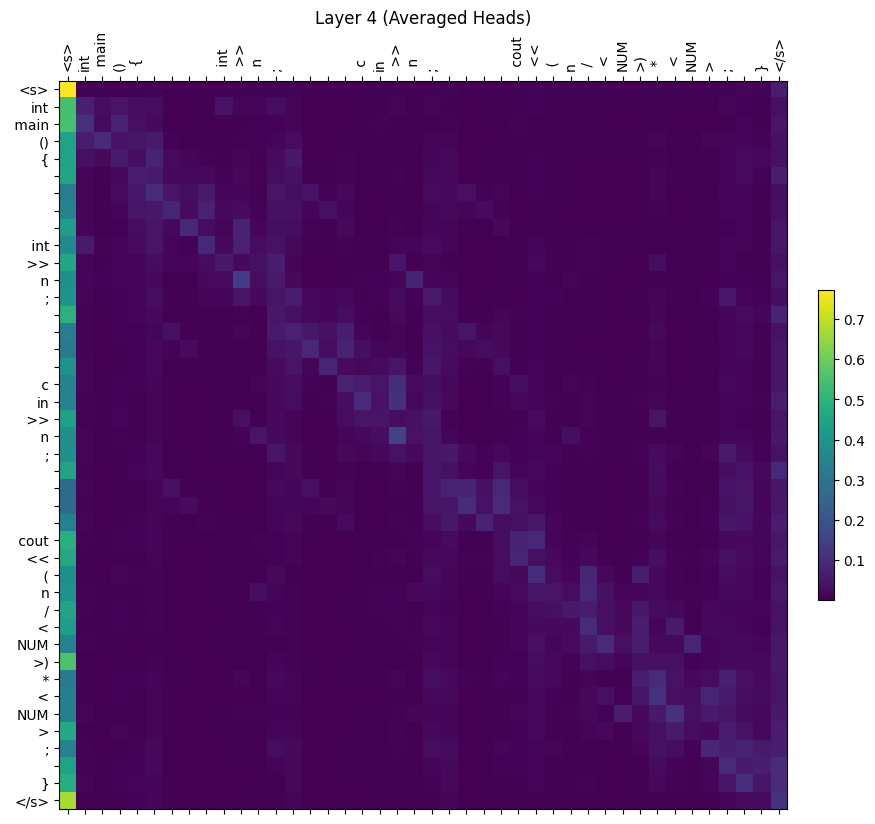

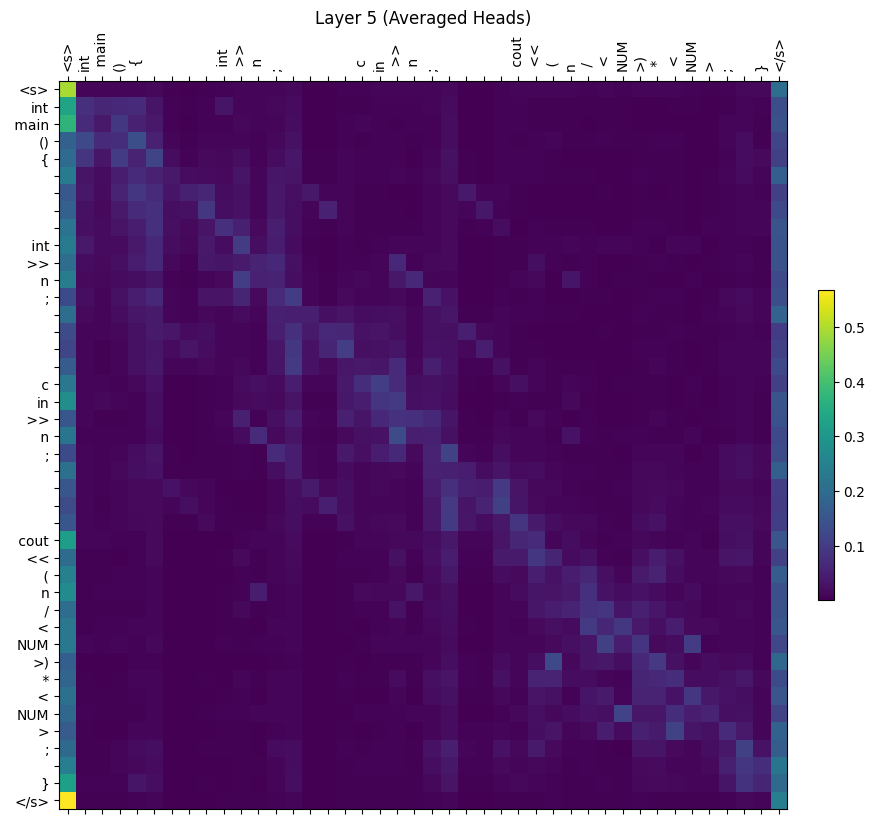

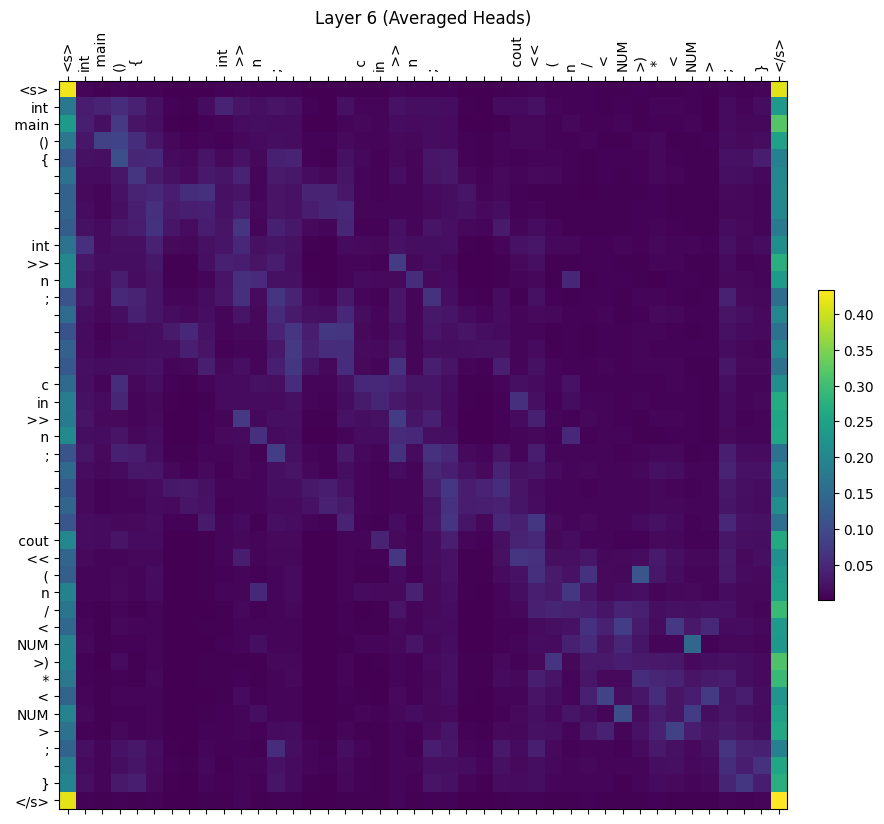

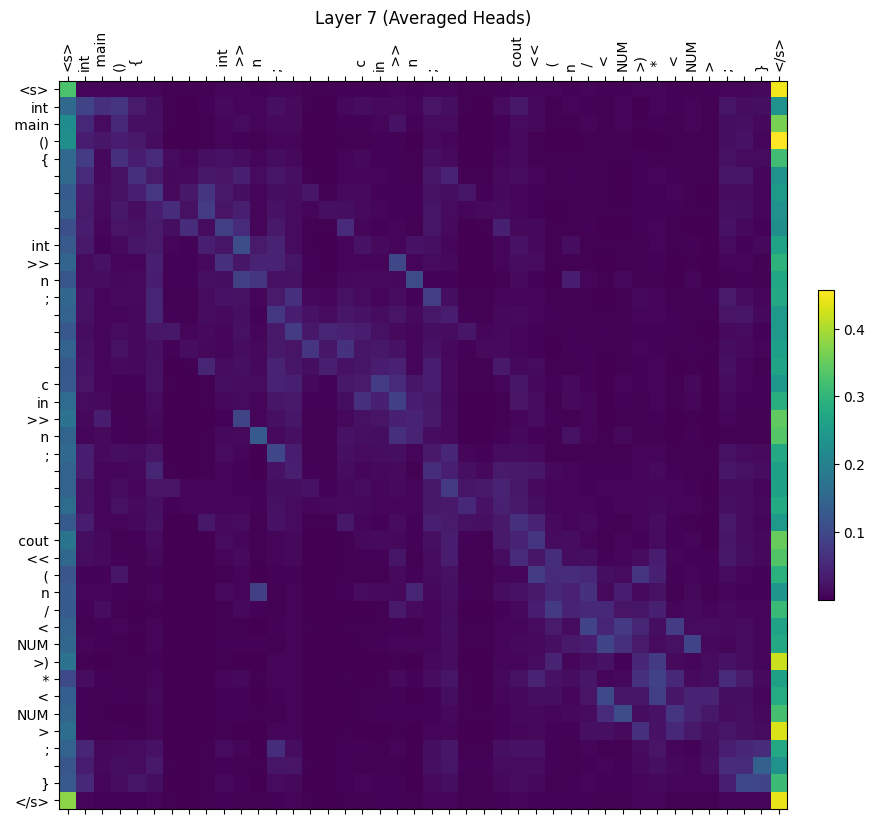

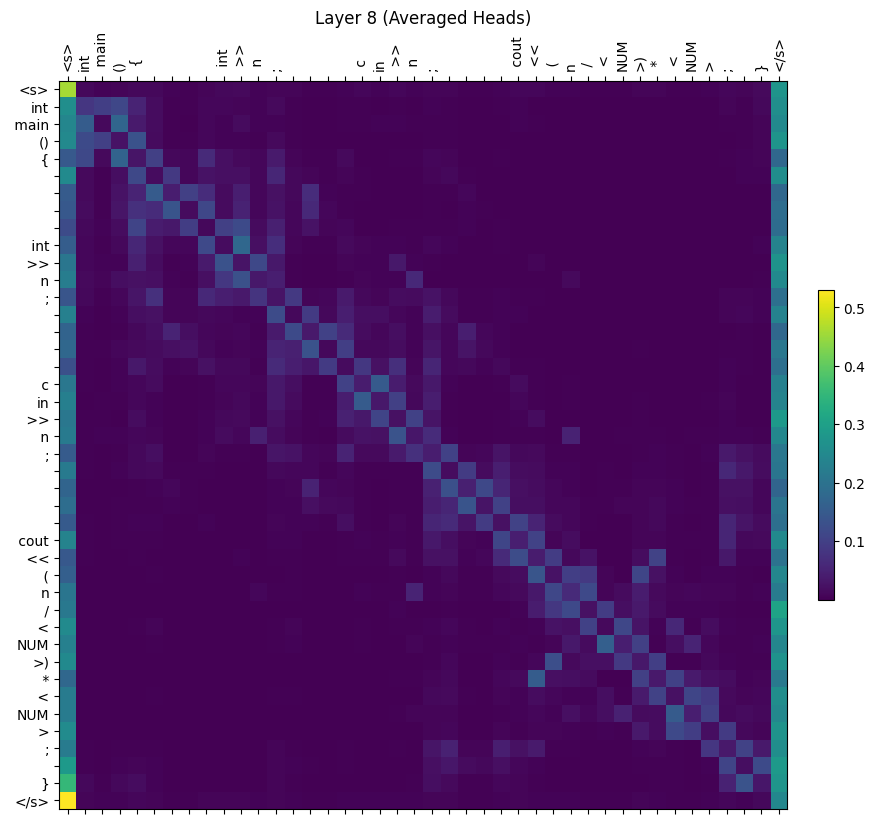

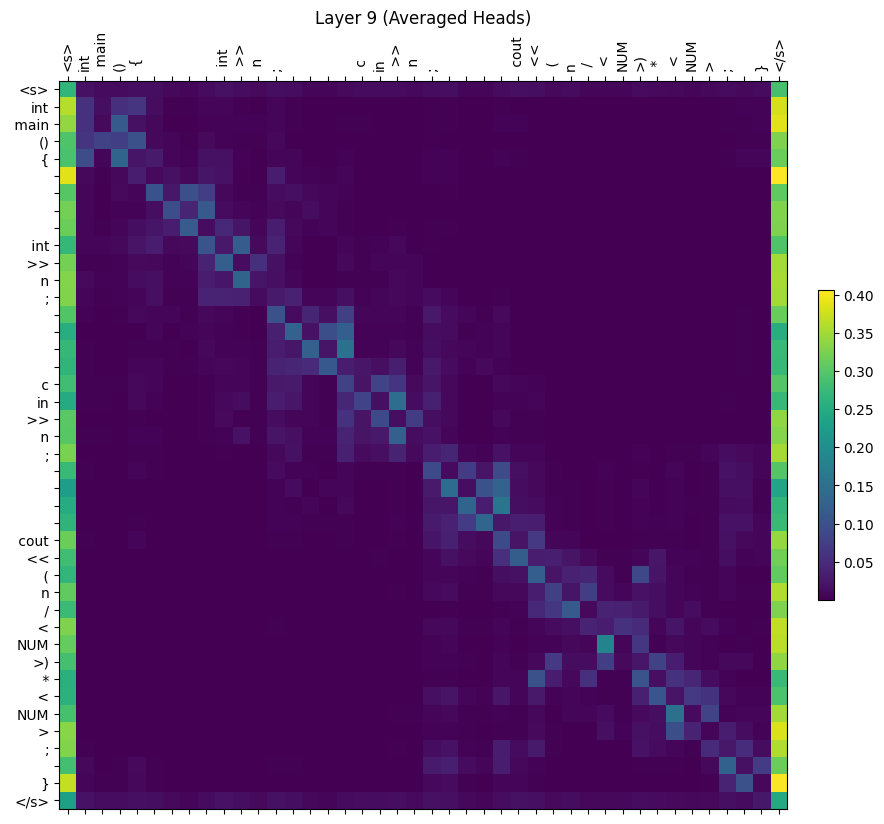

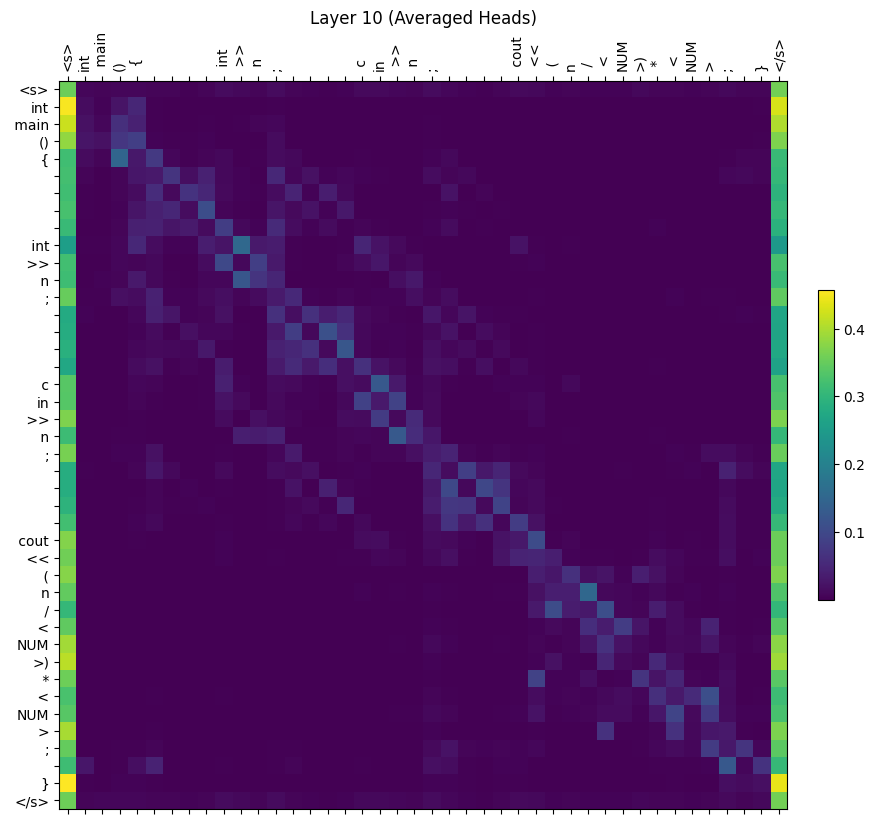

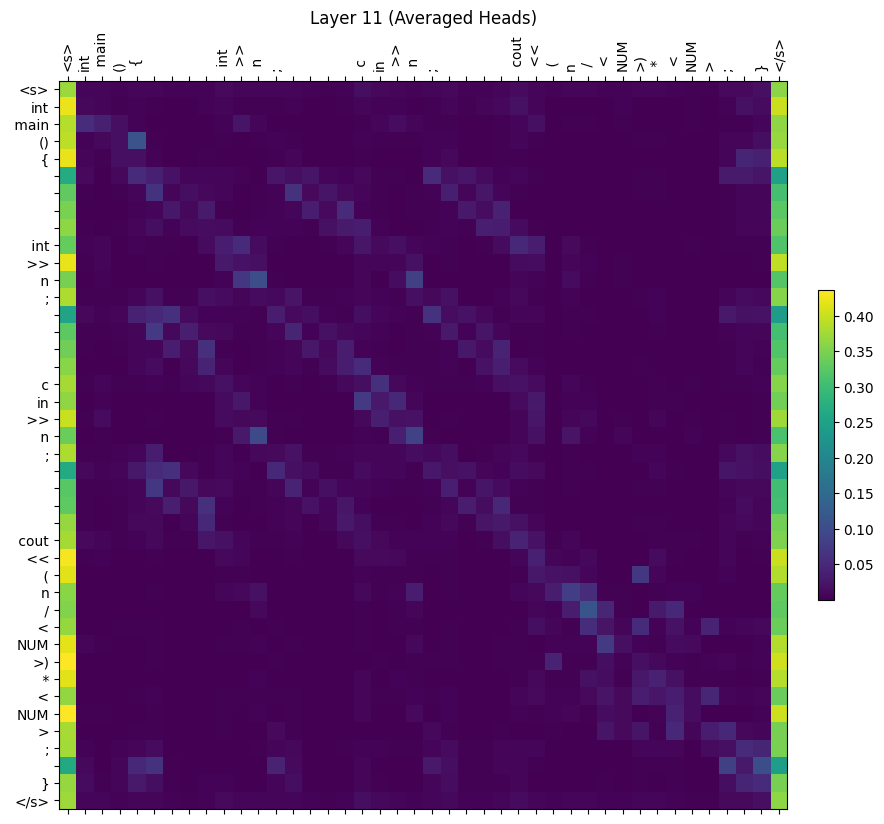

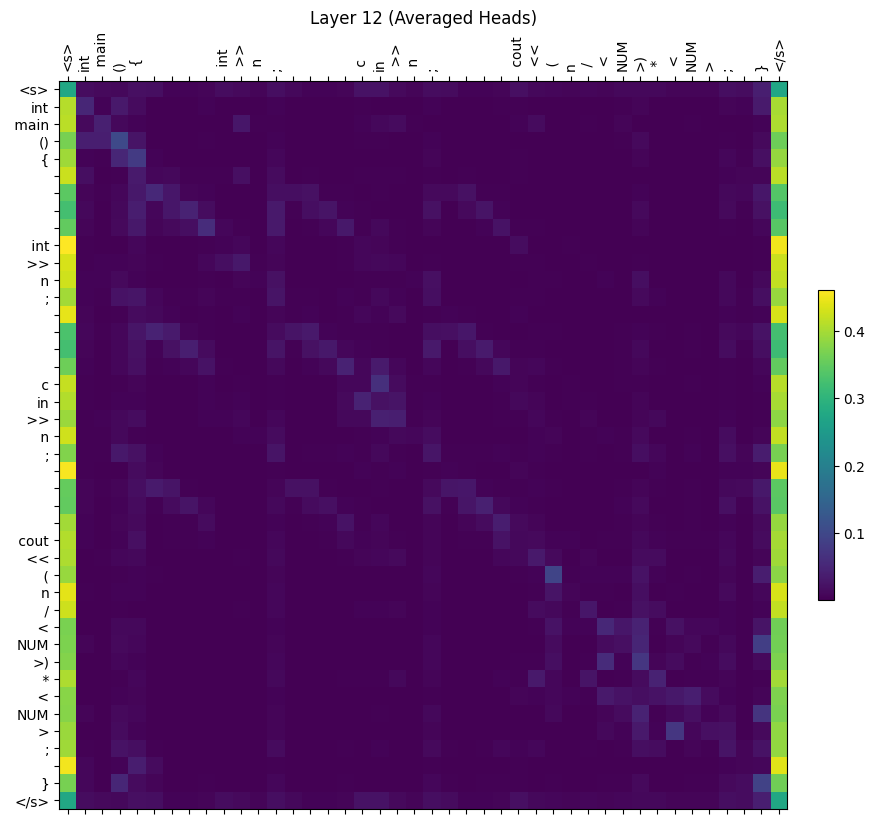

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import RobertaModel, RobertaTokenizer
import torch

tokenizer = RobertaTokenizer.from_pretrained('microsoft/codebert-base')
model = RobertaModel.from_pretrained('microsoft/codebert-base', output_attentions=True)
inputs = tokenizer("int main() {\n    int >> n;\n    cin >> n;\n    cout << (n / <NUM>) * <NUM>;\n}", return_tensors='pt')


outputs = model(**inputs)
attentions = outputs.attentions

input_ids = inputs['input_ids'][0].tolist()

def plot_attention(attention, title, input_ids):
    token_ids = input_ids
    attention_matrix = attention

    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(attention_matrix, cmap='viridis')

    ax.set_xticks(np.arange(len(token_ids)))
    ax.set_yticks(np.arange(len(token_ids)))

    ax.set_xticklabels([tokenizer.decode([id_]) for id_ in token_ids], rotation=90)
    ax.set_yticklabels([tokenizer.decode([id_]) for id_ in token_ids])

    ax.set_title(title)
    
    fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()

num_layers = len(attentions)
num_heads = attentions[0].size(1)

for layer in range(num_layers):
    avg_attention = torch.mean(attentions[layer][0], dim=0).detach().numpy()
    plot_attention(avg_attention, f'Layer {layer + 1} (Averaged Heads)', input_ids)
